<a href="https://colab.research.google.com/github/PaulToronto/IBM---AI-Engineering-Professional-Certificate/blob/main/3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.multioutput import ClassifierChain

## `sklearn.datasets`

- Mostly 3 types of functions:
    1. `fetch_*`: such as `fetch_openml()` for real-life datasets
    2. `load_*`: to load small toy datasets
    3. `make_*`: to generate fake dataset
- Generated datasets are often returned as an `(X,y)` tuple of NumPy arrays
- Other datasets are returned as `sklearn.utils.Bunch` objects which are dictionaries which generally contain the following keys:
    - `"DESCR"`
    - `"data"`, the input data, usually a Numpy Array
    - `"target"`
- `fetch_openml()` returns the inputs as a Pandas DataFrame and the labels as a Pandas Series
    - but the MNIST dataset contains images, so it is best to set `as_frame=False` to get the data as Numpy arrays instead

## MNIST

In [2]:
# from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='auto')
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


In [3]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist.target

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [5]:
mnist = fetch_openml('mnist_784', parser='auto', as_frame=False)
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
X, y = mnist.data, mnist.target

In [8]:
X.shape, X

((70000, 784),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [9]:
y.shape, y

((70000,), array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [10]:
print(X[0].reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

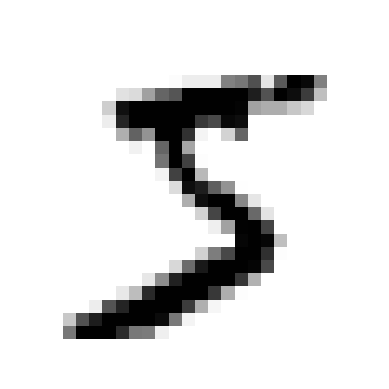

In [11]:
def plot_digit(image_data, label_data=None):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    if label_data:
        plt.title(label_data)

plot_digit(X[0])

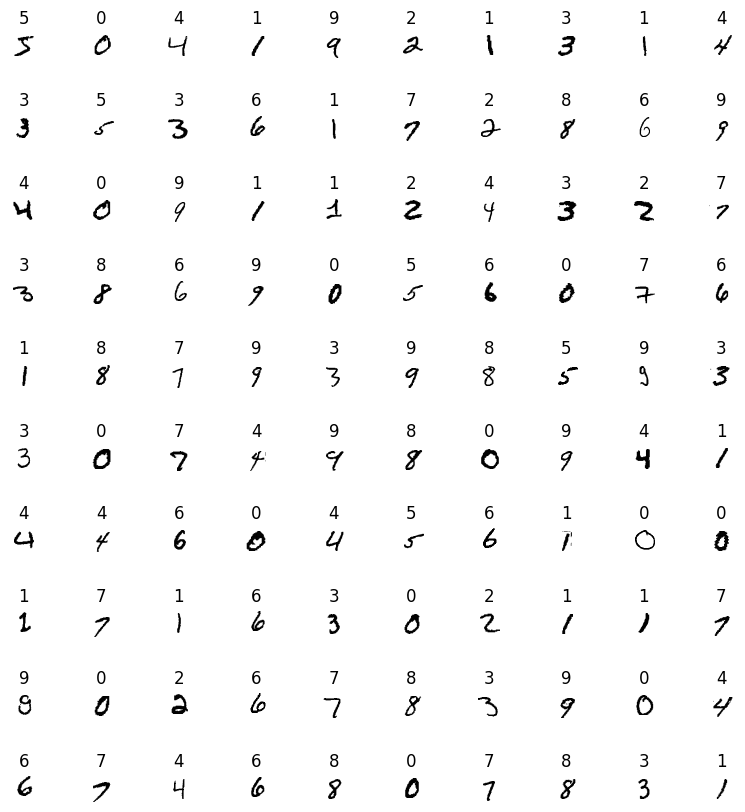

In [12]:
plt.figure(figsize=(10, 10))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data, y[idx])
plt.subplots_adjust(wspace=0, hspace=2)

## Train/Test Split

- the MNIST data returned by `fetch_openml()` is already split for us
    - the first 60000 rows are the train set
    - the last 10000 rows are the test set
    - some learning algorithms are sensitive to the order of the training instances
        - the training set is already split and shuffled for us (not always the case for datasets returned by `fetch_openml()`
        - shuffling is not always a good idea (example: time series data)

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## Training a Binary Classifier

- We simplify the problem by turning it into a "5" detector, which is a binary classification problem

In [14]:
y_train_is_5 = (y_train == '5')
y_test_is_5 = (y_test == '5')

In [15]:
y_train_is_5, y_test_is_5

(array([ True, False, False, ...,  True, False, False]),
 array([False, False, False, ..., False,  True, False]))

### `SGDClassifier()`

- stochastic gradient descent classifier
- capable of handling very large datasets efficiently
    - in part because SGD deals with training instances independently, one at a time, so it is well suited for online learning

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf

SGDClassifier(random_state=42)

In [17]:
sgd_clf.fit(X_train, y_train_is_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict(X_train[[0]],), y_train_is_5[0]

(array([ True]), True)

## Performance Measures

### Accuracy manually

In [19]:
predictions = sgd_clf.predict(X_test)
predictions

array([False, False, False, ..., False,  True, False])

In [20]:
y_test_is_5

array([False, False, False, ..., False,  True, False])

In [21]:
predictions.shape, y_test_is_5.shape

((10000,), (10000,))

In [22]:
(predictions == y_test_is_5).sum() / len(predictions)

0.9492

In [23]:
sgd_clf.score(X_test, y_test_is_5)

0.9492

In [24]:
accuracy_score(y_test_is_5, predictions)

0.9492

### Measuring Accuracy Using Cross-Validation

#### `cross_val_score`

- Uses **k-fold cross validation** with 3 folds by default
- It splits the training data into k-folds
- Trains the model k times, holding out a different fold each time for evaluation

Signature:

```python
cross_val_score(estimator,
                X,
                y=None,
                *,
                groups=None, scoring=None,
                cv=None,
                n_jobs=None,
                verbose=0, fit_params=None, pre_dispatch='2*n_jobs',error_score=nan)
```

In [25]:
predictions_train = sgd_clf.predict(X_train)

# for comparison with cross_val_score
accuracy_score(y_train_is_5, predictions_train)

0.9522666666666667

In [26]:
# from sklearn.model_selection import cross_val_score

# by default, there is no shuffling, so the splits
#. will be the same across calls
cross_val_score(sgd_clf,
                X_train,
                y_train_is_5,
                cv=3),
                #scoring='accuracy')

(array([0.95035, 0.96035, 0.9604 ]),)

Those seem like a good scores, all over 95%, but the target is imbalanced.

In [27]:
pd.Series(y_train_is_5).value_counts(normalize=True)

,proportion
False,0.90965
True,0.09035


It is a good idea to try it with `DummyClassifier`, which, with the default settings, just classifies each images as being in the most frequent class.

In [28]:
# from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf

DummyClassifier()

In [29]:
dummy_clf.fit(X_train, y_train_is_5)

DummyClassifier()

In [30]:
any(dummy_clf.predict(X_train))

False

In [31]:
cross_val_score(dummy_clf,
                X_train,
                y_train_is_5,
                cv=3,
                scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

The fact that we got over 90% accuracy with the Dummy Classifier demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially with *skewed datasets*. A much better way to evaluate the performce of a classifier is to look at the **confusion matrix (CM)**.

##### Implementing Cross-Validation

- for when you need more control over the cross-validation process
- the following code does roughly the same thing as `cross_val_score()`
- `StratifiedKFold` provides train/test indices to split the data into train/test sets
    - it is a variation of `KFold` that returns stratified folds
    - the folds are made by preserving the percentage of samples for each class

In [32]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # add shuffle=True if needed
skfolds

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [33]:
test = skfolds.split(X_train, y_train_is_5)
test

<generator object _BaseKFold.split at 0x7da27243d540>

In [34]:
test = list(test)
len(test)

3

In [35]:
len(test[0]), len(test[1]), len(test[2])

(2, 2, 2)

In [36]:
print(test[0], '\n\n', test[1], '\n\n', test[2])

(array([19964, 19965, 19966, ..., 59997, 59998, 59999]), array([    0,     1,     2, ..., 20331, 20342, 20359])) 

 (array([    0,     1,     2, ..., 59997, 59998, 59999]), array([19964, 19965, 19966, ..., 40088, 40125, 40127])) 

 (array([    0,     1,     2, ..., 40088, 40125, 40127]), array([39988, 39989, 39990, ..., 59997, 59998, 59999]))


In [37]:
len(test[0][0]), test[0][0]

(40000, array([19964, 19965, 19966, ..., 59997, 59998, 59999]))

In [38]:
len(test[0][1]), test[0][1]

(20000, array([    0,     1,     2, ..., 20331, 20342, 20359]))

In [39]:
X_train.shape, y_train_is_5.shape, 40000 + 20000

((60000, 784), (60000,), 60000)

In [40]:
for train_indices, test_indices in skfolds.split(X_train, y_train_is_5):
    print(len(train_indices), len(test_indices))

40000 20000
40000 20000
40000 20000


In [41]:
for train_indices, test_indices in skfolds.split(X_train, y_train_is_5):
    clone_clf = clone(sgd_clf)
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train_is_5[train_indices]
    X_test_fold = X_train[test_indices]
    y_test_fold = y_train_is_5[test_indices]
    print(X_train_fold.shape, y_train_fold.shape, X_test_fold.shape, y_test_fold.shape)

    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print('Accuracy:', n_correct/len(y_pred))

(40000, 784) (40000,) (20000, 784) (20000,)
Accuracy: 0.95035
(40000, 784) (40000,) (20000, 784) (20000,)
Accuracy: 0.96035
(40000, 784) (40000,) (20000, 784) (20000,)
Accuracy: 0.9604


In [42]:
# compare the accuracy scores above with cross_val_score
cross_val_score(sgd_clf,
                X_train,
                y_train_is_5,
                cv=3,
                scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

#### `cross_val_predict`

- like `cross_val_score()`, `cross_val_predict()` performs k-fold cross-validation, but instead of returning scores, it returns the predictions made on each test fold
- that means you get a "clean" prediction for each instance in the training set ("clean": means "out-of-sample": the model makes predictions on data that it has never seen before

In [43]:
# from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf,
                                    X_train,
                                    y_train_is_5,
                                    cv=3)

y_train_predict.shape, y_train_predict

((60000,), array([ True, False, False, ...,  True, False, False]))

In [44]:
first_fold = y_train_predict[:20000]
(first_fold == y_train_is_5[:20000]).sum() / len(first_fold)

0.95125

In [45]:
the_accuracy = sum(y_train_is_5 == y_train_predict) / len(y_train_predict)
the_accuracy

0.9570333333333333

### Confusion Matrices

- Each row in a confusion matrix represents an **actual class**
- Each column represents a **predicted class**

In [46]:
# from sklearn.metrics import confusion_matrix

# normalize=None is the default
cm = confusion_matrix(y_train_is_5, y_train_predict, normalize=None)
print(cm, '\n\n', np.array([['TN', 'FP'], ['FN', 'TP']]))

[[53892   687]
 [ 1891  3530]] 

 [['TN' 'FP']
 ['FN' 'TP']]


In [47]:
sgd_clf.classes_

array([False,  True])

In [48]:
# from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm,
                                    display_labels=sgd_clf.classes_)

cm_display

[['TN' 'FP']
 ['FN' 'TP']]


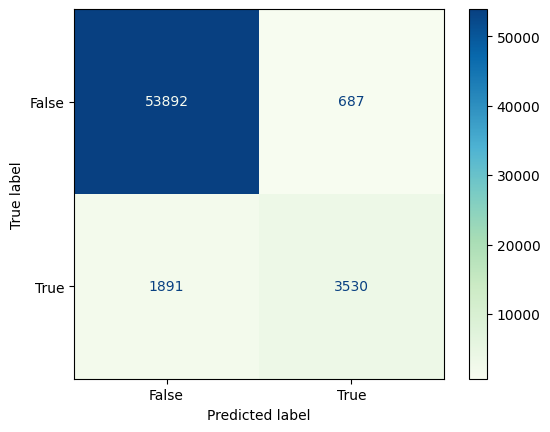

In [49]:
cm_display.plot(cmap='GnBu');
print(np.array([['TN', 'FP'], ['FN', 'TP']]))

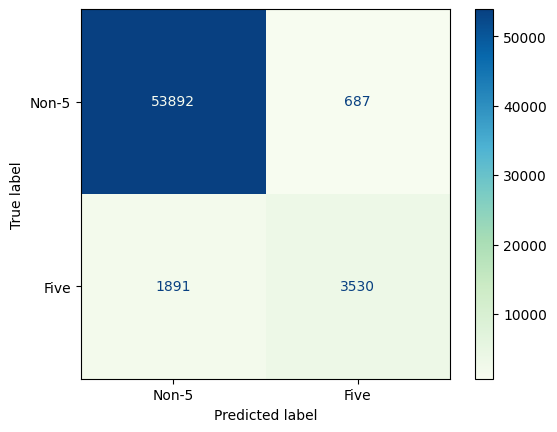

In [50]:
ConfusionMatrixDisplay(cm, display_labels=['Non-5', 'Five']).plot(cmap=plt.cm.GnBu);

- Each row in a confusion matrix represents an actual class
- Each column represents a predicted class

- **First Row**: the negative class, actual non-5 images
    - **TN**: 53892 were correctly classified as non-5
    - **FP**: 687 were incorrectly classified as 5 (Type I Error)
- **Second Row**: the positive class, actual 5 images
    - **FN**: 1891 were incorrectly classified as non-5 (Type II Error)
    - **TP**: 3530 were correctly classified as 5

### Accuracy, Precision, Recall and F1

- TN, FP, FN and TP all depend on which label is condidered **positive**
- In our case, it makes most sense for `False` to be negative and for `True` to be positive, but we can do calculations with the opposite assumption

In [51]:
# Assumption: `True` is positive
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

TN, FP, FN, TP, cm.sum()

(53892, 687, 1891, 3530, 60000)

#### Accuracy

$$
Accuracy = \frac{TP + TN}{Total}
$$

In [52]:
print(np.array([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [53]:
accuracy = (TP + TN) / cm.sum()
accuracy, accuracy_score(y_train_is_5,
                         y_train_predict)

(0.9570333333333333, 0.9570333333333333)

#### Precision

$$
Precision = \frac{TP}{TP + FP}
$$

- The accuracy of positive predictions
- Out of all those that wee\re predicted to be positive (5s), what proportion did it get right?

In [54]:
precision = TP / (TP + FP)

(precision,
 precision_score(y_train_is_5,
                 y_train_predict),
 precision_score(y_train_is_5,
                 y_train_predict,
                 pos_label=True))

(0.8370879772350012, 0.8370879772350012, 0.8370879772350012)

#### Recall

$$
Recall = \frac{TP}{TP + FN}
$$

- The ratio of positive instances that are correctly detected
- Also called sensitivity or TPR (True Positive Rate)
- Out of all those that were actually positive (5s), how many did it get right?

In [55]:
print(np.array([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [56]:
recall = TP / (TP + FN)

(recall,
 recall_score(y_train_is_5,
              y_train_predict),
 recall_score(y_train_is_5,
              y_train_predict,
              pos_label=True))

(0.6511713705958311, 0.6511713705958311, 0.6511713705958311)

In [57]:
accuracy, precision, recall

(0.9570333333333333, 0.8370879772350012, 0.6511713705958311)

- When our model predicts a positive (predicts 5) it is only correct about 83.7% of the time
- Our model only detects 65.1% of the 5s

In [58]:
# normalizes over the "true labels" (rows)
cm_norm_true = confusion_matrix(y_train_is_5, y_train_predict, normalize='true')

# normalizes over the "predicted labels" (columns)
cm_norm_pred = confusion_matrix(y_train_is_5, y_train_predict, normalize='pred')

# normlizes over all the population
cm_norm_all = confusion_matrix(y_train_is_5, y_train_predict, normalize='all')

[['TN' 'FP']
 ['FN' 'TP']]


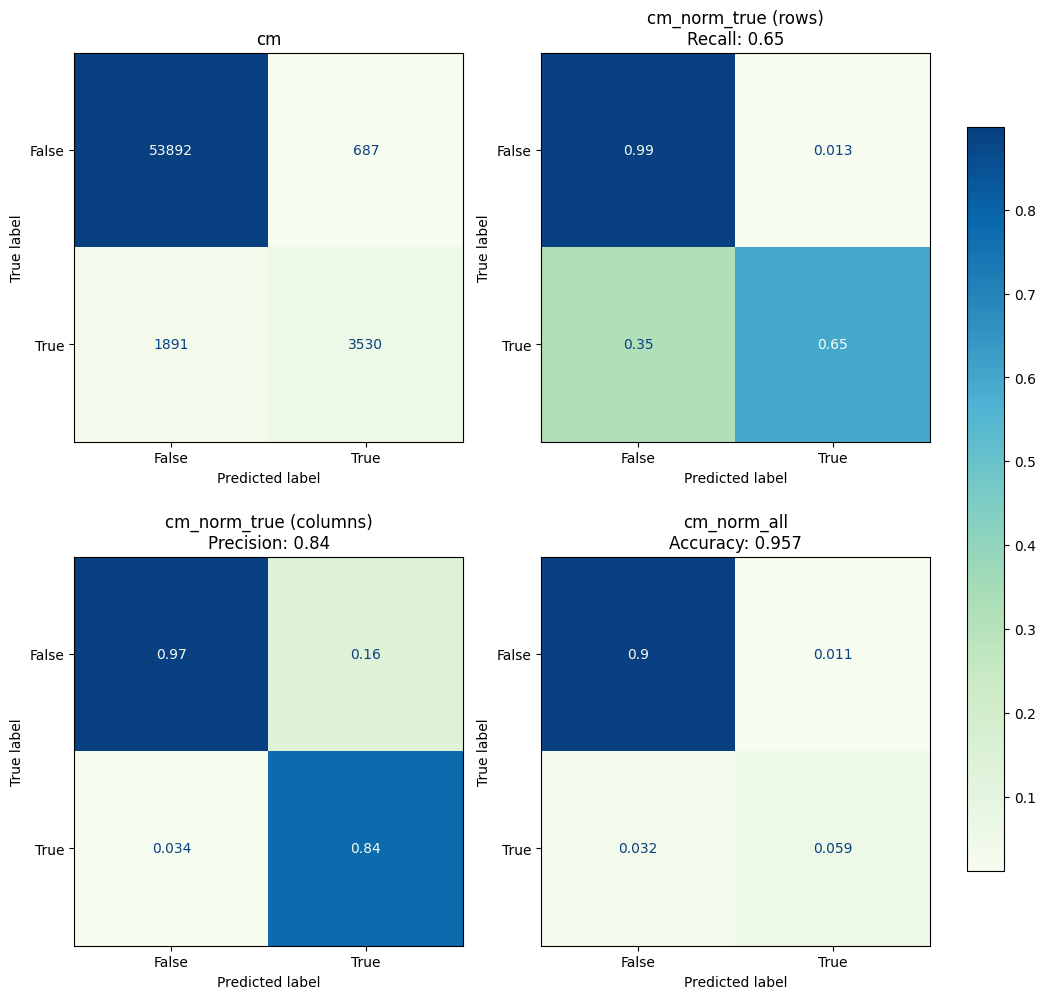

In [59]:
print(np.array([['TN', 'FP'], ['FN', 'TP']]))
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
titles = ['cm',
          f'cm_norm_true (rows)\nRecall: {recall.round(2)}',
          f'cm_norm_true (columns)\nPrecision: {precision.round(2)}',
          f'cm_norm_all\nAccuracy: {accuracy.round(3)}']
for i, conf_matrix in enumerate([cm, cm_norm_true, cm_norm_pred, cm_norm_all]):
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=sgd_clf.classes_)
    im = disp.plot(ax=axes[i],
                   cmap='GnBu',
                   colorbar=False)

    axes[i].set_title(titles[i])

fig.colorbar(im.im_, ax=axes, fraction=0.04, pad=0.04)
plt.show()

#### F1 Score

$$
F1 = 2\times\frac{precision \times recall}{precision + recall}
$$

- The harmonic mean of precision and recall
- Ranges from 0 to 1, with 1 being the best score
- The F1 score favours classifiers that have similar precision and recall
    - sometimes you care more about one than the other

In [60]:
my_f1 = 2 * (precision * recall) / (precision + recall)
my_f1

0.7325171197343846

In [61]:
f1_score(y_train_is_5, y_train_predict)

0.7325171197343847

#### Classification Report

In [62]:
# from sklearn.metrics import classification_report

print(classification_report(y_train_is_5, y_train_predict))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



In [63]:
precision_1, recall_1, f1_1 = (
    precision_score(y_train_is_5, y_train_predict, pos_label=False),
    recall_score(y_train_is_5, y_train_predict, pos_label=False),
    f1_score(y_train_is_5, y_train_predict, pos_label=False)
)

precision_1, recall_1, f1_1

(0.9661007833927899, 0.987412741164184, 0.9766405103205814)

In [64]:
precision_2, recall_2, f1_2 = (
    precision_score(y_train_is_5, y_train_predict, pos_label=True),
    recall_score(y_train_is_5, y_train_predict, pos_label=True),
    f1_score(y_train_is_5, y_train_predict, pos_label=True)
)

precision_2, recall_2, f1_2

(0.8370879772350012, 0.6511713705958311, 0.7325171197343847)

In [65]:
accuracy_score(y_train_is_5, y_train_predict)

0.9570333333333333

In [66]:
np.unique(y_train_is_5, return_counts=True)

(array([False,  True]), array([54579,  5421]))

In [67]:
support_1, support_2 = np.unique(y_train_is_5, return_counts=True)[1]
support_1, support_2

(54579, 5421)

In [68]:
macro_avg_prec, macro_avg_recall, macro_avg_f1 = (
    (precision_1 + precision_2) / 2,
    (recall_1 + recall_2) / 2,
    (f1_1 + f1_2) / 2
)

macro_avg_prec, macro_avg_recall, macro_avg_f1

(0.9015943803138955, 0.8192920558800075, 0.8545788150274831)

In [69]:
weighted_avg_prec, weighted_avg_recall, weighted_avg_f1 = (
    (precision_1 * support_1 + precision_2 * support_2) / (support_1 + support_2),
    (recall_1 * support_1 + recall_2 * support_2) / (support_1 + support_2),
    (f1_1 * support_1 + f1_2 * support_2) / (support_1 + support_2)
)

weighted_avg_prec, weighted_avg_recall, weighted_avg_f1

(0.9544444763564337, 0.9570333333333333, 0.9545839619811185)

### The Precision/Recall Trade-off

- We look at how the `SGDClassifier` makes its classification decisions
- For each instance, it computes a score based on a **decision function**
- If that score is greater than the **decision threshold** it assigns the instance to the positive class, otherwise it assigns it to the negative class

<br/>
<img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/decision.png'/>
<br/>

- Suppose the decision threshold is positioned at the central arrow above, between the two 5s
 - You will find 4 true positives (actual 5s) and 1 false positive (a 6)
   - The precision is $\frac{4}{5} = 0.8$
 - But out of 6 actual 5s, the classifier only detects 4
   - The recall is $\frac{4}{6} = 0.67$
- Suppose you move the decision threshold to the right of the 6
  - The precision increases, but the recall decreases
    - The precision is $\frac{3}{3} = 1$
    - The recall is $\frac{3}{6} = 0.5$
- Skikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores
  - The `decision_function()` is used instead of `predict()` to get these scores
  - The `SGDClassifier` uses a threshold of 0

In [70]:
# the predictions
y_train_predict = cross_val_predict(sgd_clf,
                                X_train,
                                y_train_is_5,
                                cv=3,
                                method='predict')
print(len(y_train_predict), y_train_predict)

# actual values
print(len(y_train_is_5), y_train_is_5)

60000 [ True False False ...  True False False]
60000 [ True False False ...  True False False]


In [71]:
y_train_predict

array([ True, False, False, ...,  True, False, False])

In [72]:
(accuracy_score(y_train_is_5, y_train_predict),
 precision_score(y_train_is_5, y_train_predict),
 recall_score(y_train_is_5, y_train_predict))

(0.9570333333333333, 0.8370879772350012, 0.6511713705958311)

In [73]:
# the decision scores
y_train_decision_score = cross_val_predict(sgd_clf,
                                           X_train,
                                           y_train_is_5,
                                           cv=3,
                                           method='decision_function')
print(len(y_train_decision_score), y_train_decision_score)

# actual values
print(len(y_train_is_5), y_train_is_5)

60000 [  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]
60000 [ True False False ...  True False False]


In [74]:
# Since SGDClassifier uses a threshold of 0
# these predictions will be the same as y_train_predict
threshold = 0
my_predict_using_threshold_0 = y_train_decision_score > 0
my_predict_using_threshold_0

array([ True, False, False, ...,  True, False, False])

In [75]:
(y_train_predict == my_predict_using_threshold_0).sum() # they are all the same

60000

In [76]:
# same as when we used y_train_predict instead of my_predict_using_threshold_0
(accuracy_score(y_train_is_5, my_predict_using_threshold_0),
 precision_score(y_train_is_5, my_predict_using_threshold_0),
 recall_score(y_train_is_5, my_predict_using_threshold_0))

(0.9570333333333333, 0.8370879772350012, 0.6511713705958311)

In [77]:
# change the threshold to 3000
threshold = 3000
y_train_predict_threshold_3000 = (y_train_decision_score > threshold)
y_train_predict_threshold_3000

array([False, False, False, ...,  True, False, False])

In [78]:
# y_train_predict is the result of cr
(accuracy_score(y_train_is_5, y_train_predict),
 precision_score(y_train_is_5, y_train_predict),
 recall_score(y_train_is_5, y_train_predict))

(0.9570333333333333, 0.8370879772350012, 0.6511713705958311)

In [79]:
# scores when threshold = 3000
(accuracy_score(y_train_is_5, y_train_predict_threshold_3000),
 precision_score(y_train_is_5, y_train_predict_threshold_3000),
 recall_score(y_train_is_5, y_train_predict_threshold_3000))

(0.94905, 0.8911317008603574, 0.4967718133185759)

- Precision has increased and Recall has decreased

### Precision/Recall Curve

```python
# the decision scores
y_train_decision_score = cross_val_predict(sgd_clf,
                                           X_train,
                                           y_train_is_5,
                                           cv=3,
                                           method='decision_function')
```

#### Precision/Recall vs. Decision Threshold

In [80]:
thresholds = np.linspace(-50_000, 50_000, 100)

precisions = [precision_score(y_train_is_5,
                              y_train_decision_score > threshold,
                              zero_division=np.nan) for threshold in thresholds]

recalls = [recall_score(y_train_is_5,
                        y_train_decision_score > threshold,
                        zero_division=np.nan) for threshold in thresholds]

f1s = [f1_score(y_train_is_5,
                y_train_decision_score > threshold,
                zero_division=np.nan) for threshold in thresholds]

accuracies = [accuracy_score(y_train_is_5,
                             y_train_decision_score > threshold
                             ) for threshold in thresholds]

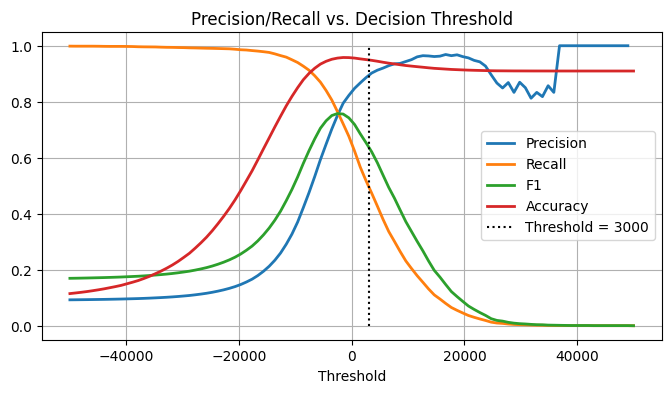

In [81]:
_, ax = plt.subplots(figsize=(8, 4))

ax.plot(thresholds, precisions, linewidth=2, label='Precision')
ax.plot(thresholds, recalls, linewidth=2, label='Recall')
ax.plot(thresholds, f1s, linewidth=2, label='F1')
ax.plot(thresholds, accuracies, linewidth=2, label='Accuracy')
ax.vlines(3000, 0, 1.0, 'k', 'dotted', label='Threshold = 3000')

ax.set_title('Precision/Recall vs. Decision Threshold')
ax.set_xlabel('Threshold')
ax.legend()
ax.grid();

- We can also use the `precision_recall_curve` function to do this for us

In [82]:
#from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_is_5, y_train_decision_score)

precisions.shape, recalls.shape, thresholds.shape

((60001,), (60001,), (60000,))

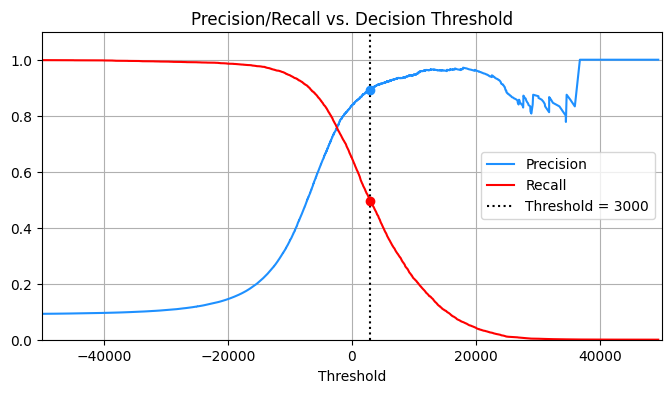

In [83]:
_, ax = plt.subplots(figsize=(8, 4))

ax.plot(thresholds, precisions[:-1], label='Precision',
        color='dodgerblue')
ax.plot(thresholds, recalls[:-1], label='Recall',
        color='red')
ax.vlines(3000, 0, 1.1, 'k', 'dotted', label='Threshold = 3000')

# idx when threshold is 3000
idx = (thresholds > 3000).argmax()
ax.plot(thresholds[idx], precisions[idx], color='dodgerblue', marker='o')
ax.plot(thresholds[idx], recalls[idx], color='red', marker='o')

ax.axis([-50_000, 50_000, 0, 1.1])
ax.set_title('Precision/Recall vs. Decision Threshold')
ax.set_xlabel('Threshold')
ax.legend()
ax.grid();

- When the threshold is 3000, the precision is near 90% and the recall is about 50%
- Another way to select a good precision/recall trade-off is to plot pecision directly against recall

#### Precision/Recall Curve

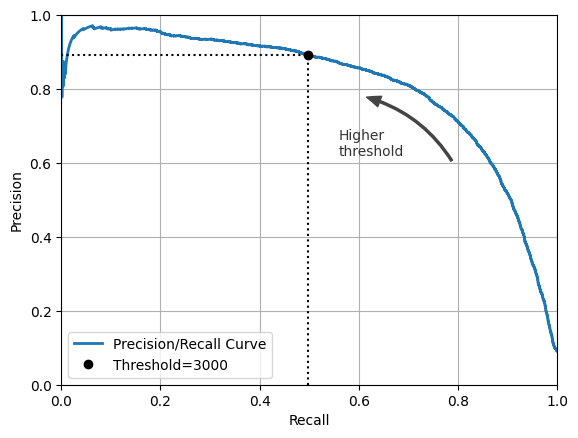

In [84]:
import matplotlib.patches as patches  # for the curved arrow

plt.plot(recalls[:-1],
         precisions[:-1],
         linewidth=2,
         label='Precision/Recall Curve')

idx = (thresholds > 3000).argmax()
plt.plot([0.0, recalls[idx]], [precisions[idx],  precisions[idx]], 'k:')
plt.plot([recalls[idx], recalls[idx]], [0,  precisions[idx]], 'k:')
plt.plot(recalls[idx], precisions[idx], 'ko', label='Threshold=3000')

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower left')
plt.show()

- Notice that the precision really starts to drop at about 80% recall
- In general, it is best to select a precision/recall trade-off just before that drop (about 60% recall)
    - But the choice really depends on your project

##### Suppose you aim for 90% precision

In [85]:
idx_for_90_precision = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

- To make predictions on the training set, instead of calling the classifiers predict method, you can run this code

In [86]:
y_train_decision_score

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [87]:
y_train_pred_90 = (y_train_decision_score >= threshold_for_90_precision)
y_train_pred_90.shape, y_train_pred_90

((60000,), array([False, False, False, ...,  True, False, False]))

In [88]:
precision_score(y_train_is_5, y_train_pred_90), recall_score(y_train_is_5, y_train_pred_90)

(0.9000345901072293, 0.4799852425751706)

- Now we have a 90% precision classifier, but the recall isn't good

### The ROC Curve

#### First a quick review:

$$
Accuracy = \frac{TP + TN}{Total}
$$

$$
Precision = \frac{TP}{TP + FP}
$$

$$
Recall = \frac{TP}{TP + FN}
$$

$$
F1 = 2\times\frac{precision \times recall}{precision + recall}
$$

- The **Receiver Operating Characteristic curve (ROC)** is another common tool used with binary classifiers
- It is similar to the precision/recall cover, but instead of plotting precision vs recall, it the **True Postive Rate (TPR) vs the False Positive Rate (FPR)**
    - the TPR is just another name for recall
    - the FPR is also called the fall-out,
        - it is the ratio of negative instances that are incorrectly classified as poitive

$$
\text{Recall} = TPR = \frac{TP}{TP + FN}
$$

$$
\text{Fall-out} = FPR = \frac{FP}{FP + TN}
$$

In [89]:
# from sklearn.metrics import roc_curve

fpr, tpr, thresholds2 = roc_curve(y_train_is_5, y_train_decision_score)

fpr.shape, tpr.shape, thresholds2.shape

((3908,), (3908,), (3908,))

In [90]:
 # note that this time, unlike with
 #. the `precision_recall_curve`, thresholds are
 #. in descending order
thresholds2

array([             inf,   49441.43765905,   36801.60697028, ...,
       -105763.22240074, -106527.45300471, -146348.56726174])

```python
idx_for_90_precision = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

idx_for_90_precision = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision
```

In [91]:
# we can use `threshold_for_90_precision` again
#. but we need to use <= instead of >= due ot the reversed
#. order of thresholds

idx_for_90_precision = (thresholds2 <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_90_precision], fpr[idx_for_90_precision]

idx_for_90_precision, tpr_90, fpr_90

(520, 0.4799852425751706, 0.005295076861063779)

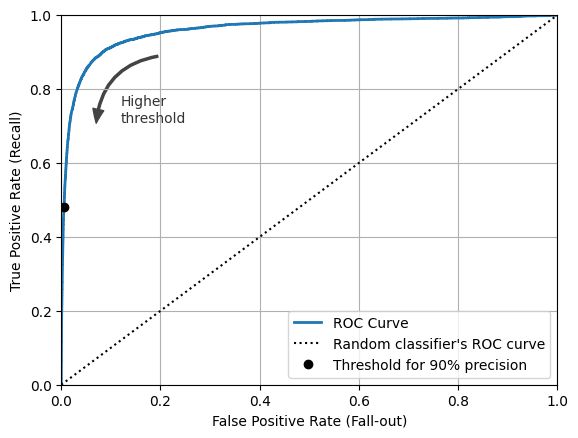

In [92]:
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k:', label='Random classifier\'s ROC curve')
plt.plot(fpr_90, tpr_90, 'ko', label='Threshold for 90% precision')


# for the arrow and text description of the arrow
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")

plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rate (Recall)')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [93]:
# the area under the curve
roc_auc_score(y_train_is_5, y_train_decision_score)

0.9604938554008616

#### My Version of ROC Curve

In [94]:
conf_m = confusion_matrix(y_train_is_5, y_train_predict)
print(conf_m, '\n\n', np.array([['TN', 'FP'], ['FN', 'TP']]))

[[53892   687]
 [ 1891  3530]] 

 [['TN' 'FP']
 ['FN' 'TP']]


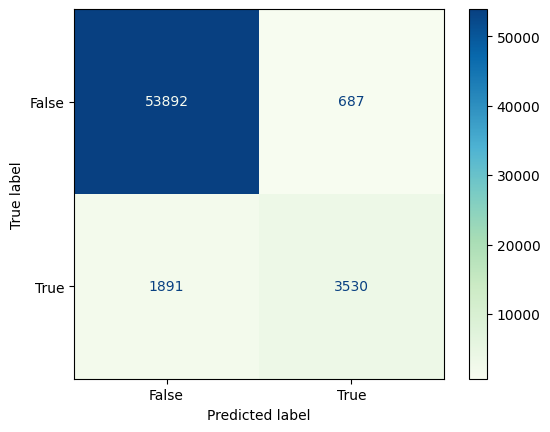

In [95]:
ConfusionMatrixDisplay(conf_m, display_labels=sgd_clf.classes_).plot(cmap='GnBu');

In [96]:
def my_recall(y_true, y_pred):
    conf_m = confusion_matrix(y_true, y_pred)
    tp = conf_m[1, 1]
    fn = conf_m[1, 0]
    return tp / (tp + fn)

def my_fallout(y_true, y_pred):
    conf_m = confusion_matrix(y_true, y_pred)
    fp = conf_m[0, 1]
    tn = conf_m[0, 0]
    return fp / (fp + tn)

In [97]:
thresholds3 = thresholds2[np.isfinite(thresholds2)]
thresholds3.shape, thresholds3

((3907,),
 array([  49441.43765905,   36801.60697028,   35987.20307515, ...,
        -105763.22240074, -106527.45300471, -146348.56726174]))

In [98]:
my_thresholds = np.linspace(thresholds3.min(), thresholds3.max(), 100)
my_thresholds
my_tpr = [my_recall(y_train_is_5,
                    y_train_decision_score > t) for t in my_thresholds]
my_fpr = [my_fallout(y_train_is_5,
                    y_train_decision_score > t) for t in my_thresholds]

In [99]:
len(my_thresholds), len(my_tpr), len(my_fpr)

(100, 100, 100)

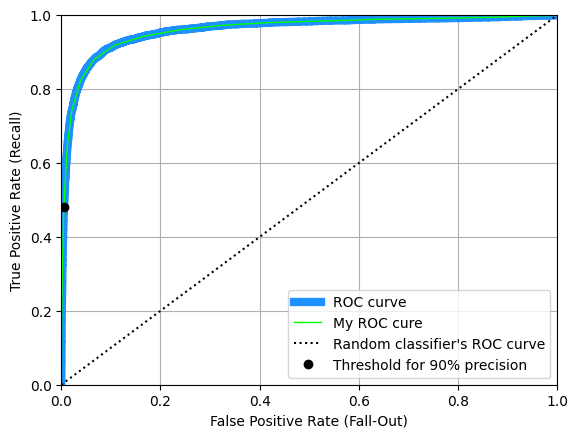

In [100]:
plt.plot(fpr, tpr, linewidth=6, label='ROC curve', c='dodgerblue')
plt.plot(my_fpr, my_tpr, linewidth=1, c='lime', label='My ROC cure')

plt.plot([0, 1], [0, 1], 'k:', label='Random classifier\'s ROC curve')
plt.plot(fpr_90, tpr_90, 'ko', label='Threshold for 90% precision')

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower right')
plt.show()

- The higher the recall (TPR), the higher the fall-out (FPR)
- The dotted line represntes the ROC curve of a purely random classifier
    - a good classifier stays as far away from that line as possible (toward the top-left corner)
- One way to compare classifiers is to measure the **area under the curve (AUC)**
    - a perfect classifier will have a **ROC AUC** equal to 1
    - a purely random classifier will have a **ROC AUC** equal to 0.5

In [101]:
# area under the curve: AUC

# from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_is_5, y_train_decision_score)

0.9604938554008616

#### Which to use? Precision/Recall Curve or ROC Curve

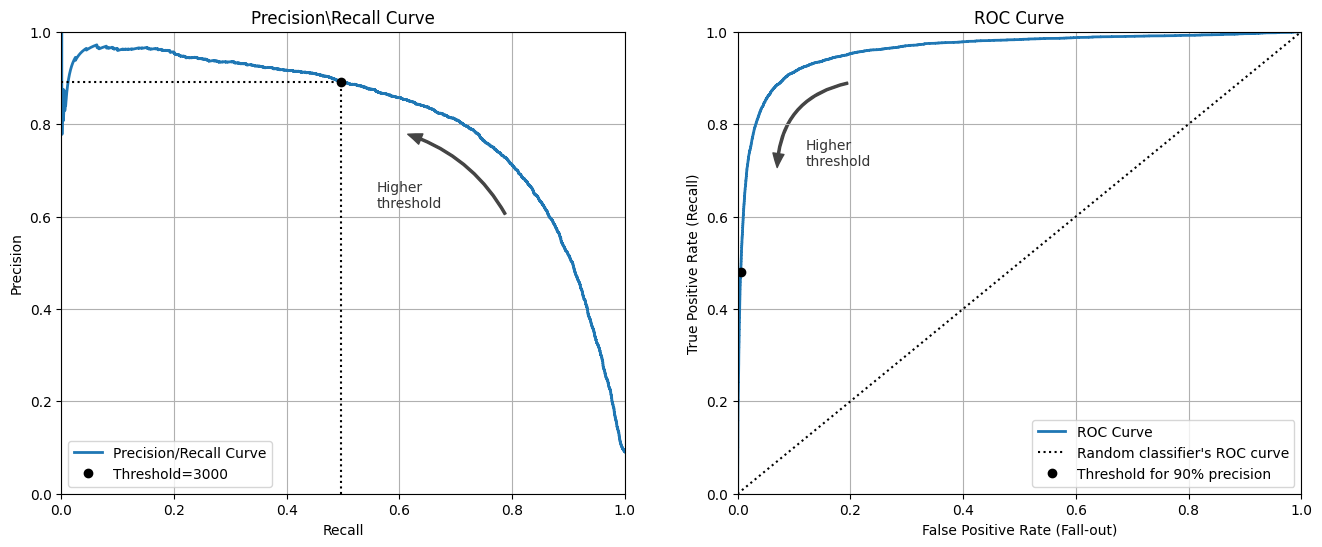

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))


ax[0].plot(recalls[:-1],
         precisions[:-1],
         linewidth=2,
         label='Precision/Recall Curve')

idx = (thresholds > 3000).argmax()
ax[0].plot([0.0, recalls[idx]], [precisions[idx],  precisions[idx]], 'k:')
ax[0].plot([recalls[idx], recalls[idx]], [0,  precisions[idx]], 'k:')
ax[0].plot(recalls[idx], precisions[idx], 'ko', label='Threshold=3000')

ax[0].add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
ax[0].text(0.56, 0.62, "Higher\nthreshold", color="#333333")

ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('Precision\Recall Curve')
ax[0].axis([0, 1, 0, 1])
ax[0].grid()
ax[0].legend(loc='lower left')

ax[1].plot(fpr, tpr, linewidth=2, label='ROC Curve')
ax[1].plot([0, 1], [0, 1], 'k:', label='Random classifier\'s ROC curve')
ax[1].plot(fpr_90, tpr_90, 'ko', label='Threshold for 90% precision')

# for the arrow and text description of the arrow
ax[1].add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
ax[1].text(0.12, 0.71, "Higher\nthreshold", color="#333333")

ax[1].set_xlabel('False Positive Rate (Fall-out)')
ax[1].set_ylabel('True Positive Rate (Recall)')
ax[1].set_title('ROC Curve')
ax[1].axis([0, 1, 0, 1])
ax[1].grid()
ax[1].legend(loc='lower right')

plt.show()

- In general, use the PR curve whenever the positive class is rare, or when you care more about the false positives than the false negatives, otherwise, use the ROC curve
    - In our example, based on the ROC curve and the AUC, it looks like a really good classifier, but that is mostly because the positive class is rare
    - In contrast, the PR curve makes it clear that the classifier has room for improvement (curve could be closer to the top-right corner)

## Comparing Classifiers

### `RandomForestClassifier()` vs `SGDClassifier()`

In [103]:
# this is what we did before, repeated here

sgd_clf = SGDClassifier(random_state=42)

y_train_decision_scores = cross_val_predict(sgd_clf,
                                            X_train,
                                            y_train_is_5,
                                            cv=3,
                                            method='decision_function')

precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train_is_5, y_train_decision_scores)

y_train_decision_scores.shape, precisions_sgd.shape, recalls_sgd.shape, thresholds_sgd.shape

((60000,), (60001,), (60001,), (60000,))

In [104]:
y_train_decision_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [105]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf

RandomForestClassifier(random_state=42)

- The `precision_recall_curve()` function expects labels and scores, so we need to train the random forest classifier and make it assign as score to each instance
    - but unlike `SGDClassifier()`, the `RandomForestClassifier()` does not have a `decsion_function()` method due to the way it works (covered in Chapter 7)
    - it does have a `predict_proba()` function that returns class probabilities for each instance
        - we will just use the probability for the positive class for the scores
- we can use `cross_val_predict()` to train the random forest classifier and get the scores

In [106]:
y_probas_forest = cross_val_predict(
    forest_clf,
    X_train,
    y_train_is_5,
    cv=3,
    method='predict_proba'
)

In [107]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [108]:
# confused about the order of our classes?
sgd_clf.fit(X_train, y_train_is_5).classes_, forest_clf.fit(X_train, y_train_is_5).classes_

(array([False,  True]), array([False,  True]))

- By looking at first item in `y_probas_forest`, we can see that the model predicts that the first image is positive (it's a `5`) with an 89% probability
- Note that these are estimated probabilities
    - these estimated probabilities can be calibrated using the `sklearn.calibration` package
    - of those images that the model classified positive with a probability between 0.5 and 0.6, almost 94% of them are actually positive
        - our model's probabilities are much too low

In [109]:
# the 94% claim
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_is_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [110]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [111]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest.shape, y_scores_forest

((60000,), array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06]))

In [112]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_is_5, y_scores_forest)

y_train_decision_scores.shape, precisions_sgd.shape, recalls_sgd.shape, thresholds_sgd.shape

((60000,), (60001,), (60001,), (60000,))

### Comparison

In [113]:
sgd_clf.score(X_test, y_test_is_5), forest_clf.score(X_test, y_test_is_5)

(0.9492, 0.9877)

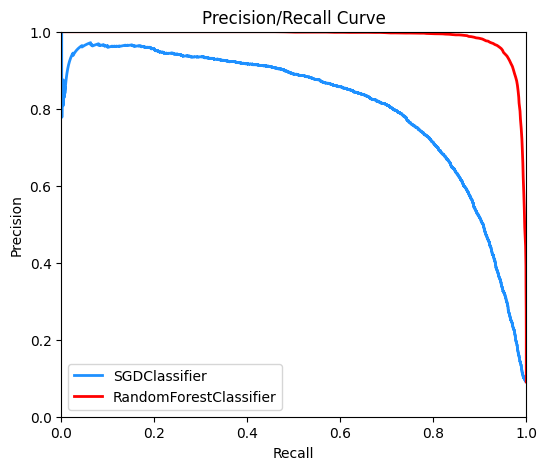

In [114]:
plt.figure(figsize=(6, 5))

plt.plot(recalls_sgd, precisions_sgd,
         color='dodgerblue', linewidth=2,
         label='SGDClassifier')
plt.plot(recalls_forest, precisions_forest,
         color='red', linewidth=2,
         label='RandomForestClassifier')

plt.title('Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.legend(loc='lower left')

plt.show()

#### Predictions

- can use `cross_val_predict` with the default method: 'predict'
- can also use our scores with the default threshold of 50% probability

In [115]:
sgd_predictions = cross_val_predict(sgd_clf,
                                    X_train,
                                    y_train_is_5,
                                    cv=3,
                                    # method='decision_function'
                                    )
sgd_predictions

array([ True, False, False, ...,  True, False, False])

In [116]:
sgd_predictions2 = y_train_decision_scores >= 0.5
sgd_predictions2

array([ True, False, False, ...,  True, False, False])

In [117]:
sgd_predictions.shape ,sgd_predictions2.shape, (sgd_predictions == sgd_predictions2).sum()

((60000,), (60000,), 60000)

In [118]:
forest_predictions = cross_val_predict(
    forest_clf,
    X_train,
    y_train_is_5,
    cv=3,
    #method='predict_proba'
)

forest_predictions

array([ True, False, False, ...,  True, False, False])

In [119]:
forest_predictions2 = y_scores_forest >= 0.5
forest_predictions2

array([ True, False, False, ...,  True, False, False])

In [120]:
# randomness?
forest_predictions.shape, forest_predictions2.shape, (forest_predictions == forest_predictions2).sum()

((60000,), (60000,), 59962)

In [121]:
f1_score(y_train_is_5, sgd_predictions), f1_score(y_train_is_5, forest_predictions)

(0.7325171197343847, 0.9242275142688448)

In [122]:
recall_score(y_train_is_5, sgd_predictions), recall_score(y_train_is_5, forest_predictions)

(0.6511713705958311, 0.8662608374838591)

In [123]:
precision_score(y_train_is_5, sgd_predictions), precision_score(y_train_is_5, forest_predictions)

(0.8370879772350012, 0.9905083315756169)

In [124]:
roc_auc_score(y_train_is_5, y_train_decision_scores), roc_auc_score(y_train_is_5, y_scores_forest)

(0.9604938554008616, 0.9983436731328145)

## Multiclass Classification

- binary classifiers can distinguish between 2 classes
- multiclass classifiers (aka multinomial classifiers) can distinguish between more than 2 classes
- some sklearn classifiers are capable of handling multiple classes natively
    - `LogisticRegression`
    - `RandomForestClassifier`
    - `GaussianNB`
- others are strictly binary (but there are strategies to overcome this limitation)
    - `SGDClassifier`
    - `SVC`

### One-versus-the-rest (OvR) aka One-versus-all (OvA)

- One way to classify the digit images into 10 classes is to train 10 binary classifiers, one for each digit (0-dectector, 1-detector,ssss   dddddd

### One-versus-one (OvO)

- Train a binary classifier for every pair of digits
- If there are $N$ classes you need to train $(N * (N-1)) / 2$ classifiers
- In that case of MNIST that means 45 classifiers
    - To classify an image, run it through all 45 classifiers and see which class wins the most duels
- The main advantage of **OvO** is that each classifier only needs to be trained on the part of the training set containing the two classes that it must distinguish
    

### OvR or OvO?

- Some algorithms, such as support vector machines, scale poorly with the size of the training set. For such algorithms, **OvO** is preferred since it is faster to train many classifiers on small training sets than to train a few classifiers on large training sets
- For most binary classification algorithms, **OvR** is preferred
- Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it outomatically runs **OvR** or **OvO**, depending on the algorithm

In [125]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [126]:
# from sklearn.svm import SVC

# sklearn choses the OvO strategy
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # y_train, not y_train_is_5

SVC(random_state=42)

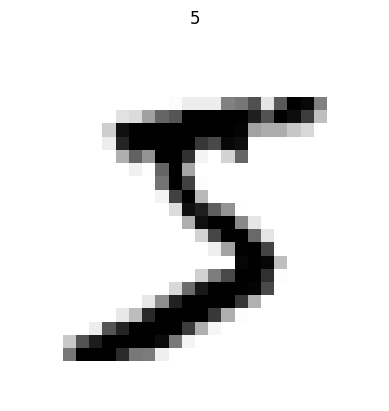

In [127]:
plot_digit(X_train[0], y_train[0])

In [128]:
svm_clf.predict(X_train[[0]]) # a correct prediction

array(['5'], dtype=object)

In [129]:
svm_clf.decision_function_shape

'ovr'

**OvR** was used.

In [130]:
svm_clf.decision_function(X_train[[0]]), svm_clf.decision_function(X_train[[0]]).argmax()

(array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
          9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]]),
 5)

In [131]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

You can force Scikit-Learn to use a particular strategy for the multiclass prediction

In [132]:
# from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SVC(random_state=42))
ovo_clf.fit(X_train[:2000], y_train[:2000])

OneVsOneClassifier(estimator=SVC(random_state=42))

In [133]:
ovo_clf.predict(X_train[[0]])

array(['5'], dtype=object)

In [134]:
ovo_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [135]:
ovo_clf.decision_function(X_train[[0]])

array([[ 3.79036372,  0.72982646,  6.0496505 ,  8.29824157, -0.29301871,
         9.30146432,  1.74642332,  2.77341303,  7.20451423,  4.81969169]])

In [136]:
len(ovo_clf.estimators_), ovo_clf.estimators_[:3]

(45, (SVC(random_state=42), SVC(random_state=42), SVC(random_state=42)))

In [137]:
for est in ovo_clf.estimators_:
    print(est.classes_, est.predict(X_train[[0]]), est.decision_function(X_train[[0]]))

[0 1] [0] [-0.11369818]
[0 1] [1] [0.20916342]
[0 1] [1] [1.01718893]
[0 1] [0] [-0.53172503]
[0 1] [1] [1.03251841]
[0 1] [0] [-0.1994263]
[0 1] [0] [-0.0791571]
[0 1] [1] [0.31803683]
[0 1] [1] [0.04185468]
[0 1] [1] [0.44732972]
[0 1] [1] [1.21562243]
[0 1] [0] [-0.16343355]
[0 1] [1] [1.00010853]
[0 1] [1] [0.14284038]
[0 1] [1] [0.32366362]
[0 1] [1] [0.84016708]
[0 1] [1] [0.35762257]
[0 1] [1] [0.94941108]
[0 1] [0] [-0.78835192]
[0 1] [1] [1.00010081]
[0 1] [0] [-0.45886927]
[0 1] [0] [-0.24280133]
[0 1] [1] [0.26827076]
[0 1] [0] [-0.24628817]
[0 1] [0] [-1.5414056]
[0 1] [1] [0.75395916]
[0 1] [0] [-1.12691203]
[0 1] [0] [-1.13199474]
[0 1] [0] [-1.06607097]
[0 1] [0] [-1.20425801]
[0 1] [1] [1.39569303]
[0 1] [1] [0.52349672]
[0 1] [1] [0.42116609]
[0 1] [1] [0.99182876]
[0 1] [1] [0.91119862]
[0 1] [0] [-1.21189204]
[0 1] [0] [-0.99983292]
[0 1] [0] [-1.00018632]
[0 1] [0] [-1.06518843]
[0 1] [1] [0.01998499]
[0 1] [1] [0.68397378]
[0 1] [1] [0.14465816]
[0 1] [1] [0.304504

In [138]:
sgd_clf2 = SGDClassifier(random_state=42)
sgd_clf2.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [139]:
sgd_clf2.predict(X_train[[0]]) # incorrect, it happens

array(['3'], dtype='<U1')

In [140]:
sgd_clf2.decision_function(X_train[[0]]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [141]:
sgd_clf2.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [142]:
pd.DataFrame({'Classes': sgd_clf2.classes_,
              'Decision Function': sgd_clf2.decision_function(X_train[[0]]).round()[0]}). \
              sort_values(by='Decision Function', ascending=False)

,Classes,Decision Function
3,3,1824.0
5,5,-1386.0
8,8,-4604.0
2,2,-9531.0
9,9,-12051.0
7,7,-16148.0
4,4,-22320.0
6,6,-26189.0
0,0,-31893.0
1,1,-34420.0


`3` wins, but `5` is a close second, and based on the scores, the classifier is not very confident about its choice

In [143]:
# overall, the classifier is not too bad
cross_val_score(sgd_clf2,
                X_train,
                y_train,
                cv=3,
                scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

Just using a `StandardScaler` can improve the score

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
cross_val_score(sgd_clf2,
                X_train_scaled,
                y_train,
                cv=3,
                scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

### Error Analysis

If this were a real project, you would

- Follow the checklist in Appendix A
- Explore data preparation options
- Try out multiple models
- Fine tune their parameters using `GridSearchCV`
- Automate as much as possible

Let's just assume we have found a promising model and want to find ways to improve it. One way to do this is analyze the types of errors it makes

In [146]:
y_train_predict = cross_val_predict(sgd_clf2,
                                    X_train_scaled,
                                    y_train,
                                    cv=3)

In [147]:
y_train_predict

array(['3', '0', '4', ..., '5', '6', '8'], dtype='<U1')

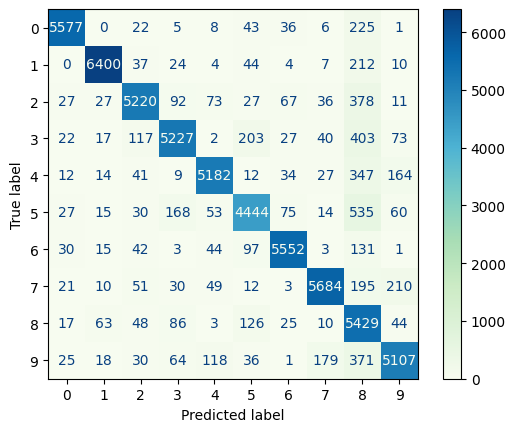

In [148]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict, cmap=plt.cm.GnBu);

- Most images are the the main diagonal, which is good
- Looking at the 5th row, we can see that the model made more errors on 5s (or maybe there were fewer 5s in the dataset? - should normalize it)

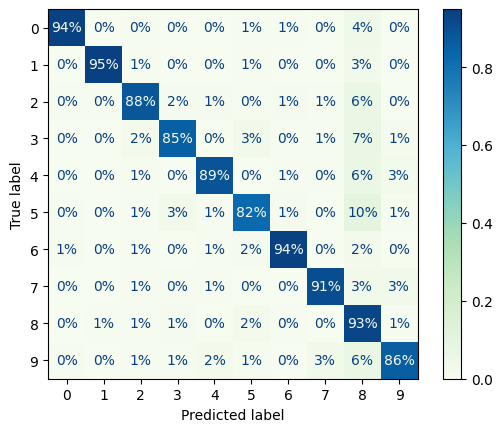

In [149]:
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_predict,
                                        normalize='true',
                                        values_format='.0%',
                                        cmap=plt.cm.GnBu);

- Normalized, we can now see that it only classified 82% of the 5s correctly, worse than any other digit
- 10% of 5s were incorrectly classified as 8s
    - the most common error for 5s
    - but only 2% of 8s were misclassified as 5s
- If we look at the 8 column, we can see that a lot of other digits were also misclassified as 8s

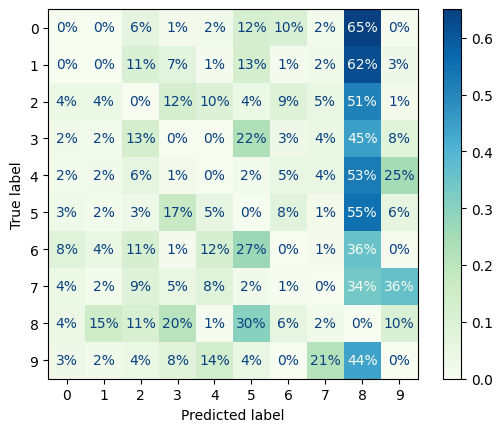

In [150]:
# we can make errors stand out more
#. by putting zero weight on correct predictions
sample_weight = (y_train_predict != y_train)

ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_predict,
                                        sample_weight = sample_weight,
                                        normalize='true',
                                        values_format='.0%',
                                        cmap=plt.cm.GnBu);

- Column 8 is really blue, where most of the errors are
- But be careful with the interpretation
    - Column 9, Row 7: 36%
    - does not mean that 36^ of all 7s are misclassified as 9s
    - it means that 36% of the errors made on 7s were misclassified as 9s
- Normalized
    - if 'true', the confusion matrix is normalized over the true conditions (e.g. rows);
    - if 'pred', the confusion matrix is normalized over the predicted conditions (e.g. columns);
    - if 'all', the confusion matrix is normalized by the total number of samples;
    - if None (default), the confusion matrix will not be normalized.

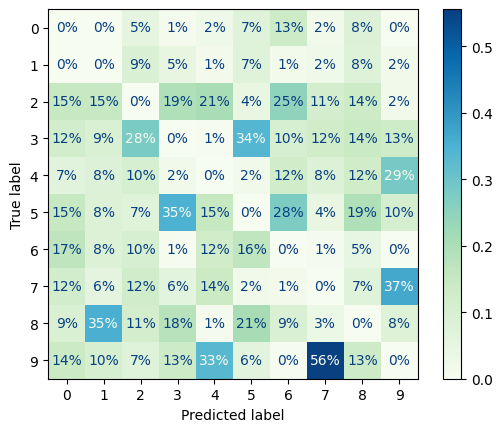

In [151]:
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_predict,
                                        sample_weight = sample_weight,
                                        normalize='pred',
                                        values_format='.0%',
                                        cmap=plt.cm.GnBu);

- Here we see that 56% of 9s were misclassified as 7s
- All in all, efforts should be spent on reducing the false 8s
    - Gather more training data for digits that look like 8s (but are not)
    - Engineer new features that would help the classifier
        - For example, writing an algorithm to count the number of closed loops: 8 has two, 6 has one, 5 has none
    - Preprocess the images using: Scikit-Image, Pillow or OpenCV
        - This might make some patterns, such as closed loops, stand out more
- It might help to analyze some individual errors, by looking at the image and the prediction, as shown below:

In [152]:
cl_a, cl_b = '3', '5'

X_aa = X_train[(y_train == cl_a) & (y_train_predict == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_predict == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_predict == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_predict == cl_b)]

In [153]:
X_aa

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

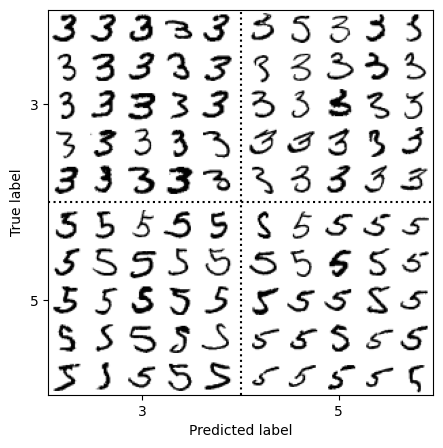

In [154]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

- **Data augmentation**, covered in Chapter 14, may help improve the model

## Multilabel Classification

- Until nlow, each instance has always been assgined to just one class
- Consider a face-recognitionm classfier that has been trained to recognize 3 faces: Alice, Bob and Charlie
    - When a classifier has been shown an image of Alice and Charlie, it should output: [True, False, True]
    - This approach assumes all labels are equally important
        - If you have many more pictures of Alice than of the other two, you may want to give more weight to the classifier's score on pictures of Alice
            - One way to do this is to give each label a weight equal to its ***support*** (i.e. the number of instances with that target label): do this by setting `average='weighted'` when calling the `f1_score` function
- Below, we construct a toy example

In [155]:
y_train_large = (y_train > '7')
y_train[y_train_large]

array(['9', '8', '9', ..., '9', '8', '8'], dtype=object)

In [156]:
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_train[y_train_odd]

array(['5', '1', '9', ..., '1', '3', '5'], dtype=object)

In [157]:
# np.c_: Translates slice objects to
# concatenation along the second axis
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [158]:
y_train_large[:3], y_train_odd[:3]

(array([False, False, False]), array([ True, False, False]))

In [159]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

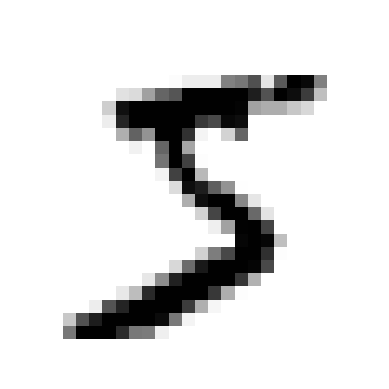

In [160]:
plot_digit(X_train[0])

In [161]:
knn_clf.predict(X_train[[0]]) # correct!

array([[False,  True]])

- Not all sklearn classifiers support multilabel classification natively (example, SVC)
- In those cases, one possible strategy is to train one model per label
    - However this model might have a hard time capturing the dependencies between the labels
    - For example, a large digit (7, 8, 9), is twice as likely to be odd than even, but the classifier for the "odd" label does not know what the classifier for the "large" label predicted
    - To solve this, the models can be organized in a chain: when a model makes a prediction, it uses teh input features, pluss all the previous predictions from the change: `ChainClassifier`

### `ChainClassifier`

- By default, it will use the true labels for training, feeding each model the appropriate labels depending on their position in the change
- But if you set the `cv` hyperparameter, it will use cross-validation to get "clean", out-of-sample predictions from each trained model for every instance in the training set, and these predictions will then be used to train all the models later in the chain

In [162]:
# from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

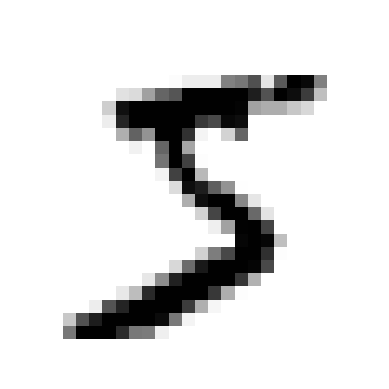

In [163]:
plot_digit(X_train[0])

In [164]:
chain_clf.predict(X_train[[0]])

array([[0., 1.]])

## Multioutput Classification

- It is a generalization of multilabel classification wehre each label can be multiclass
- To illustrate this, let's build a system that removes noise from images
- Note that teh classifier's output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity from 0 to 255)

In [165]:
# add some noise to the images
np.random.seed(42)
noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))
noise_train.shape, noise_test.shape

((60000, 784), (10000, 784))

In [166]:
X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test

X_train_mod.shape, X_test_mod.shape

((60000, 784), (10000, 784))

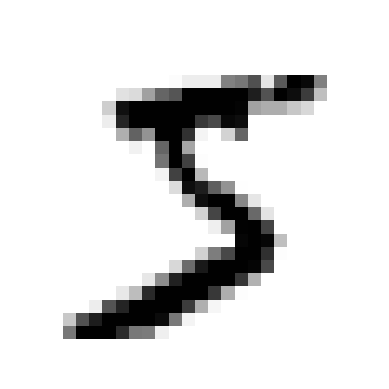

In [167]:
plot_digit(X_train[[0]])

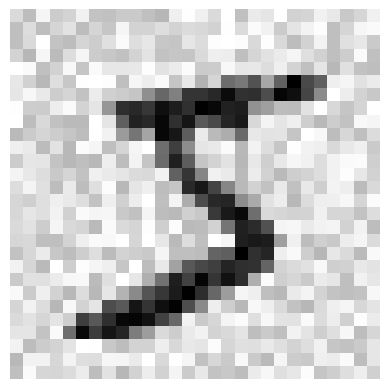

In [168]:
plot_digit(X_train_mod[[0]])

In [169]:
knn_clf2 = KNeighborsClassifier()
knn_clf2.fit(X_train_mod, y_train)

KNeighborsClassifier()

In [170]:
knn_clf2.predict(X_train_mod[[0]])

array(['5'], dtype=object)